<a href="https://colab.research.google.com/github/Ankur099IIT/Convolution-and-Pooling/blob/main/Convolution_and_Pooling.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

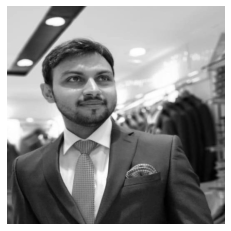

In [216]:
from scipy import misc
import matplotlib.pyplot as plt
import cv2

ascent_image=cv2.imread('/content/Ankur pic.jpg', cv2.IMREAD_GRAYSCALE) #cv2.IMREAD_GRAYSCALE convert the 3 dimensional colour image to the 2 dimensional grey image
ascent_image = cv2.resize(ascent_image, (512, 512))  # resize the image
plt.imshow(ascent_image)
plt.grid(False)
plt.gray()
plt.axis('off')
plt.show()




In [217]:
ascent_image.shape

(512, 512)

In [218]:
import numpy as np
image_transformed=np.copy(ascent_image)
size_x = image_transformed.shape[0]
size_y = image_transformed.shape[1]


In [219]:
# lets create a filter

filter= [[0,1,0], [1,-4,1], [0,1,0]]
weight = 1


In [220]:
#Iterate over the image

for x in range(1, size_x-1):
  for y in range(1, size_y-1):
    convolution = 0.0
    convolution = convolution + (ascent_image[x-1, y-1] * filter[0][0])
    convolution = convolution + (ascent_image[x-1, y] * filter[0][1])
    convolution = convolution + (ascent_image[x-1, y+1] * filter[0][2])
    convolution = convolution + (ascent_image[x, y-1] * filter[1][0])
    convolution = convolution + (ascent_image[x, y] * filter[1][1])
    convolution = convolution + (ascent_image[x, y+1] * filter[1][2])
    convolution = convolution + (ascent_image[x+1, y-1] * filter[2][0])
    convolution = convolution + (ascent_image[x+1, y] * filter[2][1])
    convolution = convolution + (ascent_image[x+1, y+1] * filter[2][2])


    convolution = convolution * weight

    if convolution.any()<0:
      convolution = 0
    if convolution.any()> 255:
      convolution = 255

    image_transformed[x, y]= convolution


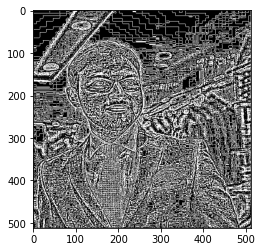

In [221]:
plt.imshow(image_transformed)
plt.gray()
plt.show()

In [222]:
# Pooling

new_image = np.zeros([int(size_x/2), int(size_y/2)])



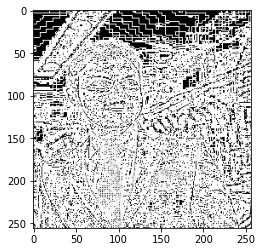

In [223]:
for x in range(0, size_x, 2):
 for y in range(0,size_y, 2):
   pixel=[]
   pixel.append(image_transformed[x,y])
   pixel.append(image_transformed[x,y+1])
   pixel.append(image_transformed[x+1, y])
   pixel.append(image_transformed[x+1, y+1])

   new_image[int(x/2), int(y/2)] = max(pixel)

plt.imshow(new_image)